# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 27

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,3.947368,15,17.700624,3.8,4.484158,6.986341,4.717803,2.068388
12,Martínez,Aston Villa,54,26.140351,149,122.538101,5.7,4.687699,5.101512,4.598285,2.017265
560,Kelleher,Liverpool,45,2.000000,10,8.308469,5.0,4.154234,NaN,4.062317,1.958325
96,Pope,Burnley,56,26.808511,126,115.520642,4.7,4.309103,3.384767,4.410021,1.820928
326,Dubravka,Newcastle Utd,48,2.000000,10,7.958217,5.0,3.979108,NaN,4.014361,1.816206
597,Sánchez,Brighton,45,15.897436,62,61.049346,3.9,3.840201,4.313281,3.877203,1.810288
431,Fabianski,West Ham,50,25.000000,105,100.840076,4.2,4.033603,3.737415,4.076616,1.803882
213,Meslier,Leeds United,46,25.813953,111,98.874870,4.3,3.830288,4.952226,3.720408,1.785881
516,Areola,Fulham,45,26.750000,107,100.369940,4.0,3.752147,3.277952,3.619179,1.768779


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,21.028112,7.0,5.257028,NaN,5.006209,2.506190
273,Stones,Manchester City,53,16.875000,108,80.821254,6.4,4.789408,3.591583,4.668284,2.080386
277,Cancelo,Manchester City,62,22.000000,110,112.489098,5.0,5.113141,3.676319,4.993821,2.053487
75,Bernardo,Brighton,39,2.941176,5,11.664348,1.7,3.965878,NaN,3.945488,2.008200
123,James,Chelsea,50,22.051282,86,98.851768,3.9,4.482813,4.239835,4.778082,2.004775
104,Alonso,Chelsea,57,9.069767,39,41.695852,4.3,4.597235,5.743934,4.931850,1.925570
576,Dawson,West Ham,45,12.000000,66,48.283236,5.5,4.023603,4.195157,4.006925,1.896745
435,Cresswell,West Ham,58,27.142857,133,123.068759,4.9,4.534112,6.256629,4.526105,1.882688
109,Rüdiger,Chelsea,46,12.083333,58,48.611354,4.8,4.023009,3.792416,4.273767,1.875737


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,62,22.903226,142,125.590214,6.2,5.483516,6.452199,5.461511,2.202233
301,Lingard,West Ham,61,6.027397,44,30.759035,7.3,5.103203,4.893972,4.952599,2.066227
105,Jorginho,Chelsea,47,19.130435,88,83.098344,4.6,4.343777,4.794961,4.563608,2.003635
302,Fernandes,Manchester Utd,115,27.837838,206,183.184036,7.4,6.580397,5.671901,6.420252,1.940453
24,Saka,Arsenal,53,23.250000,93,101.947096,4.0,4.384821,3.810776,4.344999,1.904645
37,Grealish,Aston Villa,75,21.864407,129,112.070568,5.9,5.125708,1.801545,4.898393,1.871644
272,De Bruyne,Manchester City,118,23.148148,125,147.199135,5.4,6.359003,4.835461,6.340084,1.851177
570,Raphinha,Leeds United,55,21.818182,96,94.395933,4.4,4.326480,5.419322,4.085042,1.844817
390,Son,Tottenham,96,26.969697,178,152.188031,6.6,5.642927,5.797822,5.477556,1.821247


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
506,Wilson,Newcastle Utd,65,21.090909,116,104.939720,5.5,4.975590,1.400000,4.838220,1.951587
202,Bamford,Leeds United,68,27.169811,144,137.599627,5.3,5.064431,3.616667,4.781529,1.942121
388,Kane,Tottenham,113,24.931507,182,162.189393,7.3,6.505399,6.636651,6.308106,1.935239
665,Maja,Fulham,55,7.058824,24,31.800000,3.4,4.505000,NaN,4.360954,1.920938
437,Antonio,West Ham,66,18.181818,80,82.329860,4.4,4.528142,4.600000,4.366618,1.762577
514,Watkins,Aston Villa,66,26.279070,113,117.389767,4.3,4.467044,3.621417,4.258141,1.738795
224,Vardy,Leicester City,102,23.928571,134,130.329580,5.6,5.446609,3.697739,5.467152,1.705400
164,Calvert-Lewin,Everton,77,24.074074,130,111.859720,5.4,4.646481,3.835323,4.676037,1.674475
68,Maupay,Brighton,61,24.857143,87,102.299907,3.5,4.115513,3.661991,3.980601,1.666323


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,115,27.837838,206,183.184036,7.4,6.580397,6.420252,1.940453
388,Kane,Tottenham,113,24.931507,182,162.189393,7.3,6.505399,6.308106,1.935239
272,De Bruyne,Manchester City,118,23.148148,125,147.199135,5.4,6.359003,6.340084,1.851177
254,Salah,Liverpool,125,27.142857,171,158.092118,6.3,5.824446,5.696815,1.647402
390,Son,Tottenham,96,26.969697,178,152.188031,6.6,5.642927,5.477556,1.821247
271,Gündogan,Manchester City,62,22.903226,142,125.590214,6.2,5.483516,5.461511,2.202233
224,Vardy,Leicester City,102,23.928571,134,130.329580,5.6,5.446609,5.467152,1.705400
39,Hause,Aston Villa,44,4.000000,28,21.028112,7.0,5.257028,5.006209,2.506190
251,Mané,Liverpool,118,24.782609,114,129.420908,4.6,5.222247,5.105565,1.520255


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,7.0,5.257028,NaN,5.636811,5.006209,2.506190
271,Gündogan,Manchester City,62,22.903226,6.2,5.483516,6.452199,5.306675,5.461511,2.202233
273,Stones,Manchester City,53,16.875000,6.4,4.789408,3.591583,4.882609,4.668284,2.080386
112,Arrizabalaga,Chelsea,47,3.947368,3.8,4.484158,6.986341,4.155524,4.717803,2.068388
301,Lingard,West Ham,61,6.027397,7.3,5.103203,4.893972,4.695325,4.952599,2.066227
277,Cancelo,Manchester City,62,22.000000,5.0,5.113141,3.676319,5.162713,4.993821,2.053487
12,Martínez,Aston Villa,54,26.140351,5.7,4.687699,5.101512,5.089057,4.598285,2.017265
75,Bernardo,Brighton,39,2.941176,1.7,3.965878,NaN,4.202837,3.945488,2.008200
123,James,Chelsea,50,22.051282,3.9,4.482813,4.239835,4.258008,4.778082,2.004775


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,3.947368,15,17.700624,3.8,4.484158,6.986341,4.717803,2.068388
568,Telles,Manchester Utd,54,7.096774,22,25.169936,3.1,3.546673,6.703519,3.626131,1.526245
104,Alonso,Chelsea,57,9.069767,39,41.695852,4.3,4.597235,6.339835,4.931850,1.925570
388,Kane,Tottenham,113,24.931507,182,162.189393,7.3,6.505399,6.235545,6.308106,1.935239
302,Fernandes,Manchester Utd,115,27.837838,206,183.184036,7.4,6.580397,5.892575,6.420252,1.940453
542,Reguilón,Tottenham,55,15.853659,65,62.787335,4.1,3.960432,5.814405,3.870314,1.688734
437,Antonio,West Ham,66,18.181818,80,82.329860,4.4,4.528142,5.799353,4.366618,1.762577
271,Gündogan,Manchester City,62,22.903226,142,125.590214,6.2,5.483516,5.754136,5.461511,2.202233
245,Adrián,Liverpool,42,2.972973,11,10.431508,3.7,3.508780,5.730734,3.416863,1.712109


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,115,27.837838,206,183.184036,7.4,6.580397,6.365361,1.940453
272,De Bruyne,Manchester City,118,23.148148,125,147.199135,5.4,6.359003,6.107522,1.851177
224,Vardy,Leicester City,102,23.928571,134,130.329580,5.6,5.446609,6.029855,1.705400
388,Kane,Tottenham,113,24.931507,182,162.189393,7.3,6.505399,6.012690,1.935239
39,Hause,Aston Villa,44,4.000000,28,21.028112,7.0,5.257028,5.636811,2.506190
254,Salah,Liverpool,125,27.142857,171,158.092118,6.3,5.824446,5.358315,1.647402
271,Gündogan,Manchester City,62,22.903226,142,125.590214,6.2,5.483516,5.306675,2.202233
141,Zaha,Crystal Palace,71,19.807692,103,86.905366,5.2,4.387455,5.263818,1.646583
390,Son,Tottenham,96,26.969697,178,152.188031,6.6,5.642927,5.215144,1.821247


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,102,23.928571,5.6,5.446609,6.029855,1.705400,14.9,2.6,17.5,0.731343
254,Salah,Liverpool,125,27.142857,6.3,5.824446,5.358315,1.647402,14.1,3.8,17.9,0.659474
202,Bamford,Leeds United,68,27.169811,5.3,5.064431,4.354254,1.942121,13.8,2.8,16.6,0.610972
388,Kane,Tottenham,113,24.931507,7.3,6.505399,6.012690,1.935239,13.8,6.3,20.1,0.806209
302,Fernandes,Manchester Utd,115,27.837838,7.4,6.580397,6.365361,1.940453,12.5,9.3,21.8,0.783107
514,Watkins,Aston Villa,66,26.279070,4.3,4.467044,4.439121,1.738795,11.9,2.9,14.8,0.563186
164,Calvert-Lewin,Everton,77,24.074074,5.4,4.646481,5.021116,1.674475,11.0,1.0,12.0,0.498462
251,Mané,Liverpool,118,24.782609,4.6,5.222247,4.811311,1.520255,10.7,3.7,14.4,0.581053
249,Firmino,Liverpool,92,26.842105,3.8,4.420656,4.057455,1.457447,10.6,3.8,14.4,0.536471


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,...,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week23,xG_week24,xG_week25,xG_week26,xG_week27,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
437,82.32986,4.528142,3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,13,235,100.0,100.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,0.0,0.0,NaN,0.8,1.3,1.6,0.2,0.5,0.0,NaN,0.9,1.3,0.0,0.1,0.3,0.8,0.1,NaN,NaN,NaN,2.6,2.8,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,14.4,7.2,10.498742,2.8,6.095437,2.0,NaN,6.6,7.2,2.6,2.7,5.8,4.5,4.4,NaN,NaN,NaN,2


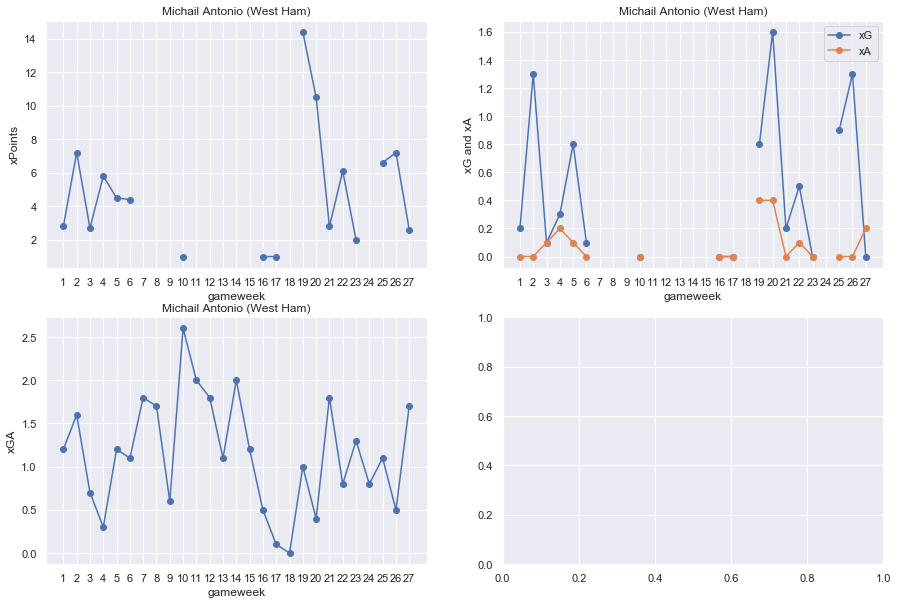

In [19]:
# find player index
name_string = 'Antonio'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 235

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('De '),'web_name']

id
272    De Bruyne
Name: web_name, dtype: object

In [20]:
my_starting11 = [12,109,558,277,271,302,272,37,388,202,437] #vardy=224, grealish=37, mane=251
my_subs = [597,461,23,74]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 64.05618997831407
Expected points next gameweek: 61.45419214369101


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,26.140351,5.7,4.687699,5.101512,4.671700,5.089057,4.598285,2.017265
109,Rüdiger,Chelsea,46,12.083333,4.8,4.023009,3.792416,4.279281,3.723208,4.273767,1.875737
558,Coufal,West Ham,46,22.820513,3.9,4.005348,4.235157,4.038241,3.562586,3.999186,1.867503
277,Cancelo,Manchester City,62,22.000000,5.0,5.113141,3.676319,4.136230,5.162713,4.993821,2.053487
271,Gündogan,Manchester City,62,22.903226,6.2,5.483516,6.452199,5.754136,5.306675,5.461511,2.202233
302,Fernandes,Manchester Utd,115,27.837838,7.4,6.580397,5.671901,5.892575,6.365361,6.420252,1.940453
272,De Bruyne,Manchester City,118,23.148148,5.4,6.359003,4.835461,5.162455,6.107522,6.340084,1.851177
37,Grealish,Aston Villa,75,21.864407,5.9,5.125708,1.801545,3.859900,5.198651,4.898393,1.871644
388,Kane,Tottenham,113,24.931507,7.3,6.505399,6.636651,6.235545,6.012690,6.308106,1.935239



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,15.897436,3.9,3.840201,4.313281,4.604615,4.122866,3.877203,1.810288
461,Saïss,Wolves,49,18.809524,4.2,3.960840,3.531492,3.270845,3.629956,4.063163,1.789325
23,Smith Rowe,Arsenal,43,11.944444,3.6,3.407530,2.754688,2.890795,3.372440,3.392793,1.643257
74,White,Brighton,44,26.071429,2.8,3.172070,3.833281,4.334615,3.446356,3.198551,1.512225


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)